### Prepare the workstation

In [82]:
# Import the Python libraries and packages that you’ll need to perform linear regression.

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets 
import numpy as np
from sklearn import linear_model
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [83]:
# load the csv file and create a dataframe
reviews = pd.read_csv('C:/Users/keeni/Desktop/LSE Notes/Course 3 - Advanced Analytics for Organisational Impact/Assignment/turtle_reviews.csv')  

# Print the DataFrame.
reviews.head() 

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


The dataset has headers, 11 columns. <br>
According to the metadata file, age, remuneration, spending score, loyalty points, product are numbers.

### Check the data

In [84]:
# View the DataFrame.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


there are 2000 rows, with the first being headers. That means 1999 records. <br>
The data types of the columns are ok.

In [85]:
# Determine if there are null values
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

There are no null values

In [86]:
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


### Remove redundant columns

In [87]:
reviews = reviews.drop(['language', 'platform'], axis=1)

In [88]:
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


The dataframe now has 9 columns

### Change column headings

In [89]:
reviews = reviews.rename(columns = {"remuneration (k£)":"remuneration"})

In [90]:
reviews = reviews.rename(columns = {"spending_score (1-100)":"spending_score"})

In [164]:
reviews.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

### Save the dataframe as a csv

In [92]:
reviews.to_csv('reviews.csv', index=False)

### Import the file and sense-check the data

In [143]:
# load the csv file and create a dataframe
reviews1 = pd.read_csv('C:/Users/keeni/Desktop/LSE Notes/Course 3 - Advanced Analytics for Organisational Impact/Assignment/reviews.csv')  

# Print the DataFrame.
reviews1.head() 

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [94]:
reviews1.shape

(2000, 9)

In [95]:
reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


# 

# 

# Linear Regression
Evaluate possible linear relationships between:
1. loyalty points and age
1. loyalty points and remuneration 
1. loyalty points and spending scores<br>

To determine whether these can be used to predict the loyalty points.

#### LR for loyalty points and age

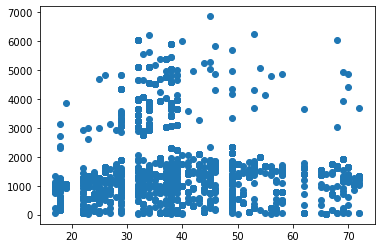

In [96]:
# Define the dependent variable.
y1 = reviews1['loyalty_points'] 

# Define the independent variable.
x1 = reviews1['age'] 

# Check for linearity with Matplotlib.
plt.scatter(x1, y1)

In [97]:
# Create formula and pass through OLS methods.
f = 'y1 ~ x1'
test1 = ols(f, data = reviews1).fit()

# Print the regression table.
test1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 23 Dec 2022   Prob (F-statistic):             0.0577
Time:                        01:05:34   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x1            -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared is very low, i.e. the model cannot explain the variability of y (loyalty points) based on the variability of x (age).

In [98]:
# Extract the estimated parameters.
print("Parameters: ", test1.params)  

# Extract the standard errors.
print("Standard errors: ", test1.bse)  

# Extract the predicted values.
print("Predicted values: ", test1.predict())  

Parameters:  Intercept    1736.517739
x1             -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x1            2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [167]:
# Create the linear regression model.
# Set the the coefficient to 1.0143 and the constant to -0.4618.
y1_pred = (1736.517739) + (-4.012805) * reviews1['age']

# View the output
y1_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

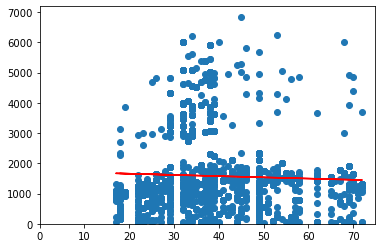

In [168]:
# Plot the data points with a scatterplot.
plt.scatter(x1, y1)

# Plot the regression line (in red).
plt.plot(x1, y1_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

#### LR for loyalty points and remuneration

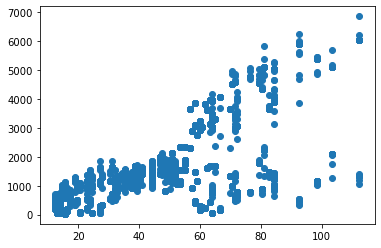

In [101]:
# Define the dependent variable.
y2 = reviews1['loyalty_points'] 

# Define the independent variable.
x2 = reviews1['remuneration'] 

# Check for linearity with Matplotlib.
plt.scatter(x2, y2)

In [102]:
# Create formula and pass through OLS methods.
f = 'y2 ~ x2'
test2 = ols(f, data = reviews1).fit()

# Print the regression table.
test2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        01:09:51   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x2            34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared sys that less than 40% of the variations of y can be explained from the variations of x. <br>
The Prob (F-statistic), p-value, is less than 0.05.
The model is not very good.

In [103]:
# Extract the estimated parameters.
print("Parameters: ", test2.params)  

# Extract the standard errors.
print("Standard errors: ", test2.bse)  

# Extract the predicted values.
print("Predicted values: ", test2.predict())  

Parameters:  Intercept   -65.686513
x2           34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x2            0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [169]:
# Create the linear regression model.
# Set the the coefficient to 1.0143 and the constant to -0.4618.
y2_pred = (-65.686513) + 34.187825 * reviews1['remuneration']

# View the output
y2_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

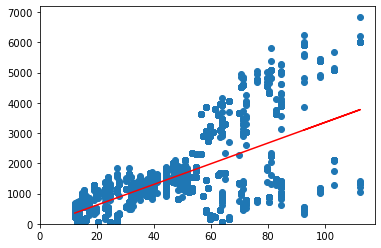

In [170]:
# Plot the data points with a scatterplot.
plt.scatter(x2, y2)

# Plot the regression line (in red).
plt.plot(x2, y2_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

#### LR for loyalty points and spending scores

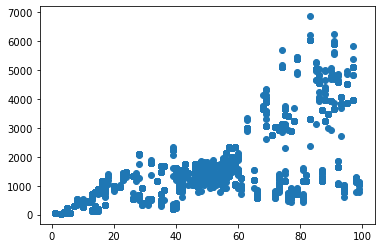

In [106]:
# Define the dependent variable.
y3 = reviews1['loyalty_points'] 

# Define the independent variable.
x3 = reviews1['spending_score'] 

# Check for linearity with Matplotlib.
plt.scatter(x3, y3)

In [107]:
# Create formula and pass through OLS methods.
f = 'y3 ~ x3'
test3 = ols(f, data = reviews1).fit()

# Print the regression table.
test3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        01:10:45   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x3            33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared says that less than 45% of the variations of y can be explained from the variations of x.
The Prob (F-statistic), p-value, is less than 0.05. The model is not very good but it is the best one seen so far.

In [108]:
# Extract the estimated parameters.
print("Parameters: ", test3.params)  

# Extract the standard errors.
print("Standard errors: ", test3.bse)  

# Extract the predicted values.
print("Predicted values: ", test3.predict())  

Parameters:  Intercept   -75.052663
x3           33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x3            0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [171]:
# Create the linear regression model.
# Set the the coefficient to 1.0143 and the constant to -0.4618.
y3_pred = (-75.052663) + 33.061693 * reviews1['spending_score']

# View the output
y3_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

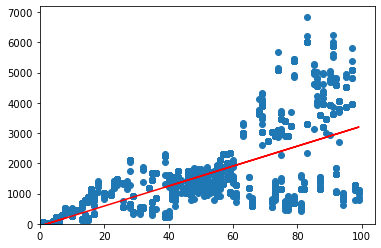

In [172]:
# Plot the data points with a scatterplot.
plt.scatter(x3, y3)

# Plot the regression line (in red).
plt.plot(x3, y3_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

# 

# 

# Multiple Linear Regression

In [111]:
# Define the dependent variable.
y = reviews1['loyalty_points']  

# Define the independent variables.
X = reviews1[['age', 'remuneration', 'spending_score']] 

In [173]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [113]:
# Call the predictions for X (array).
mlr.predict(X) 

array([ -252.52008641,  1238.47746341, -1308.43606252, ...,
        4434.8905332 ,  2066.35892261,  1575.56389984])

In [114]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_)) 

R-squared:  0.8399114912748796
Intercept:  -2203.0597513079
Coefficients:


[('age', 11.060658711843358),
 ('remuneration', 34.008385492602486),
 ('spending_score', 34.183196577633645)]

#### Make predictions

In [116]:
# Create a variable 'New_age' and define it as 43.
New_age = 43

# Create 'New_remuneration' and define it as 65.
New_remuneration = 65  

# Create 'New_spending_score' and define it as 40.
New_spending_score = 40

# Print the predicted value. 
print ("Predicted Value of loyalty_points: \n", mlr.predict([[New_age ,New_remuneration ,New_spending_score]]))  

Predicted Value of loyalty_points: 
 [1850.42149343]


C:\Users\keeni\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Train and test subsets with (MLR) multiple linear regression

In [125]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [126]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     2330.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:20:40   Log-Likelihood:                -10695.
No. Observations:                1400   AIC:                         2.140e+04
Df Residuals:                    1396   BIC:                         2.142e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2224.7503     62.932    -35.

#### Run a regression test

In [127]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [128]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [ -252.33605441  3306.0966873    355.91248089 ...  1414.72077789
 -1103.96584605  1538.39999056]


In [129]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [ 1388.6284638   3422.26082245  1640.12467474  1732.34964603
   870.43930085  1095.23465751  3362.09863273  1177.03411095
  3239.19538321  2229.98392624  -252.33605441   394.8920647
   212.00052774   947.92109702  1277.8389596   1781.15512555
  -158.27654449  1629.8452131   3174.2846839   2036.94274951
  1596.69761177  2120.12048194  1460.14223124  -728.32659158
  4381.60090816  2950.09652058  3419.95648357  1326.01587901
  -438.1493885   1318.64551083  1408.26376595  4581.54996907
  1279.05469312  3821.06058393  1270.47237702  1869.67745906
    62.39263832   376.31886868  2195.61545894   609.25567917
  1483.60132994   818.723381    1075.74919715  1629.8452131
  -866.58290325  1329.69849688  1093.70140427  1403.50146079
  -954.50292093  1927.69137604  1369.60170184  -850.31026051
  2962.06799531  1649.94165239  -267.8338259   1569.07961565
  1505.86092943  1355.16822027  1393.99173794  3957.47613262
  3781.62608732  1777.46872209  1692.15054309  1121.0132375
  

In [130]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100)  

84.97539316498234


#### Check for multicollinearity
It is likely that between 2 of our 3 indipendent variables there's a correlation, that is remuneration and spending score. <br>
But also age and spending core may have a correlation.<br>
Let's have a look.<br>

In [131]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor        features
0       21.88           const
1        1.06             age
2        1.00    remuneration
3        1.06  spending_score


the VIF is low, i.e. the indipendent variables are uncorrelated.

#### Evaluate the model

In [132]:
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))  

Mean Absolute Error (Final): 413.545903679271
Mean Square Error (Final): 291331.20172146347


High values of MAE mean that the model is bad. But loyalty score and age, remuneration and spending score have a different scale, it can be seen in the mean values. Therefore, R-square high value that not affected by the scale should be considered more important.  
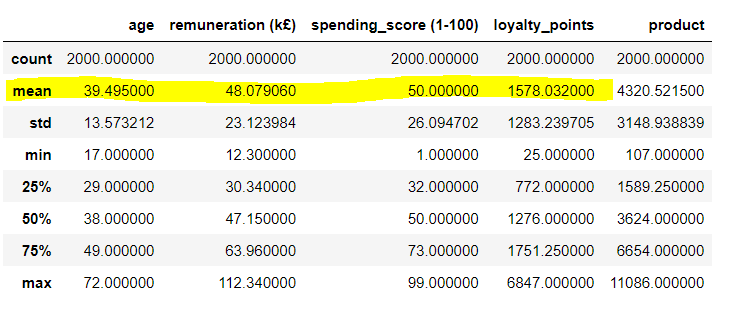

# MLR after Normalization of loyalty_points

Let's check what happens if we normalize the loyalty_points to adjust its scale.
Add a new column logloyalty to the existing reviews1 dataframe, creating the reviews2

In [149]:
reviews2 = reviews1.assign(logloyalty=np.log(reviews1['loyalty_points']))

Check that everything went all right

In [150]:
reviews2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary,logloyalty
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,5.347108
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,6.261492
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",3.688879
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,6.331502
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap,5.902633


## Repeat of MLR with revised indipendent variable

In [151]:
# Define the dependent variable.
y = reviews2['logloyalty']  

# Define the independent variables.
X = reviews2[['age', 'remuneration', 'spending_score']] 

In [152]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [153]:
# Call the predictions for X (array).
mlr.predict(X) 

array([5.6036833 , 6.88303351, 4.69883303, ..., 9.16738377, 7.10848149,
       6.71983337])

In [154]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_)) 

R-squared:  0.8164629142894955
Intercept:  3.9913086435691203
Coefficients:


[('age', 0.01023852261968886),
 ('remuneration', 0.0233861129163865),
 ('spending_score', 0.029241847628789792)]

#### Make predictions

In [155]:
# Create a variable 'New_age' and define it as 43.
New_age = 43

# Create 'New_remuneration' and define it as 65.
New_remuneration = 65  

# Create 'New_spending_score' and define it as 40.
New_spending_score = 40

# Print the predicted value. 
print ("Predicted Value of loyalty_points: \n", mlr.predict([[New_age ,New_remuneration ,New_spending_score]]))  

Predicted Value of loyalty_points: 
 [7.12133636]


C:\Users\keeni\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Train and test subsets with (MLR) multiple linear regression

In [156]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [157]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:             logloyalty   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     2338.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:36:03   Log-Likelihood:                -897.60
No. Observations:                1600   AIC:                             1803.
Df Residuals:                    1596   BIC:                             1825.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.0124      0.049     81.

#### Run a regression test

In [158]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [159]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [6.72480464 6.29110986 7.44847388 ... 7.02006824 4.90982777 7.03988399]


In [160]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [6.91526005 8.518279   7.07027355 7.14626234 6.55130074 6.64472741
 8.34289581 6.82596617 8.34260665 7.65732719 5.56746443 5.94357635
 5.98742424 6.51089872 6.802745   7.2531149  5.65226022 7.05628957
 8.2483809  7.4843897  7.02102408 7.62017827 7.06075941 5.21902744
 9.16232912 8.05337504 8.48836304 6.82919486 5.48614664 6.76184885
 6.84956067 9.32660003 6.65794445 8.74530915 6.77545561 7.22101385
 5.88549163 5.90359589 7.6684478  6.12049757 6.89689428 6.43945237
 6.63124946 7.05628957 5.087211   6.81366063 6.67094046 6.82884946
 5.05433528 7.30905916 6.93773808 5.13733213 8.10043972 7.00824494
 5.61352894 7.02254219 6.96139714 6.72480464 6.81263666 8.84656317
 8.7189997  7.2285925  7.22059618 6.67100472 6.82430733 6.71448311
 7.20731902 6.52071422 6.29110986 6.78098571 7.36301529 5.86478042
 8.84656317 8.49692134 7.34019187 6.85945233 5.68106772 8.52494166
 7.24183334 6.64472741 7.60884109 5.85571609 8.25501144 6.55130074
 6.43945237 6.00756515 6.36754012 6.4

In [161]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100)  

82.09825200912873


#### Check for multicollinearity
It is likely that between 2 of our 3 indipendent variables there's a correlation, that is remuneration and spending score. <br>
But also age and spending core may have a correlation.<br>
Let's have a look.<br>

In [162]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor        features
0       21.29           const
1        1.05             age
2        1.00    remuneration
3        1.06  spending_score


the VIF is low, i.e. the indipendent variables are uncorrelated.

#### Evaluate the model

In [163]:
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))  

Mean Absolute Error (Final): 0.3574212981997779
Mean Square Error (Final): 0.23683546257320023


We can see that the MAE is now very low, proof of the fact that our multiple linear regression model, that has also a high value of R-squared (81.5%) and Adjusted R-squared (81.4%), can predict the log of the loyalty points, therefore the loyalty points thenselves.